In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

# Retina display
%config InlineBackend.figure_format = 'retina'

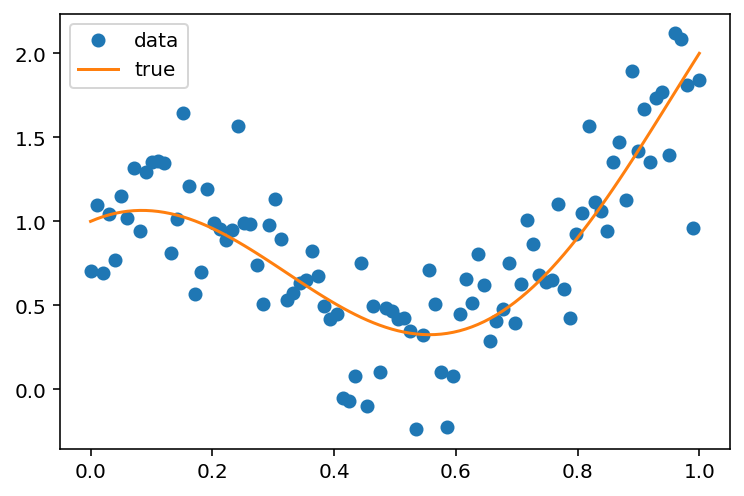

In [15]:
f_true = lambda x: np.cos(1.5 * np.pi * x) + (1+x)*np.sin(0.5 * np.pi * x)
f = lambda x: f_true(x) + np.random.randn(*x.shape) * 0.3

x = np.linspace(0, 1, 100)
y = f(x)
plt.plot(x, y, 'o', label='data')
plt.plot(x, f_true(x), label='true')
plt.legend(loc='best')


In [46]:
# Fit a phi function transformed linear model
def y_hat_basis(x_train, y_train, x_test, phi):
    model = LinearRegression()
    model.fit(phi(x_train), y_train)
    return model.predict(phi(x_test))


In [47]:
phi_linear = lambda x: x.reshape(-1, 1)

phi_poly = lambda x, d: np.stack([x**i for i in range(1, d+1)], axis=1)


In [27]:
phi_linear(x).shape, phi_poly(x, 3).shape

((100, 1), (100, 3))

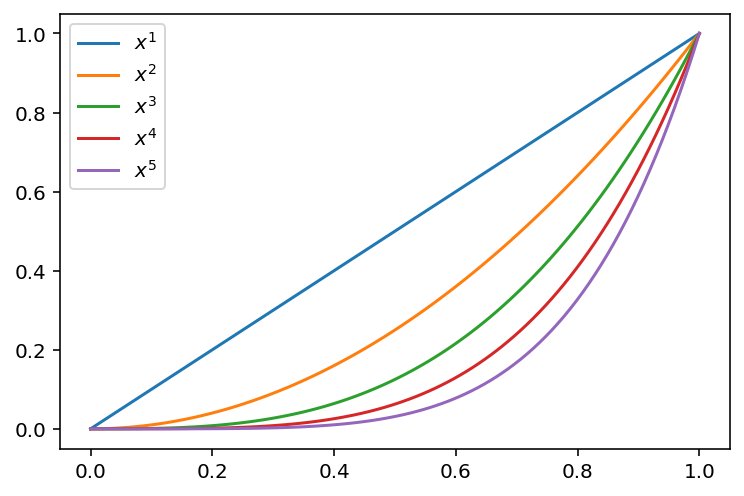

In [39]:
d = 5
plt.plot(x, phi_poly(x, d))
# add legend
plt.legend([fr'$x^{i+1}$' for i in range(d)], loc='best')


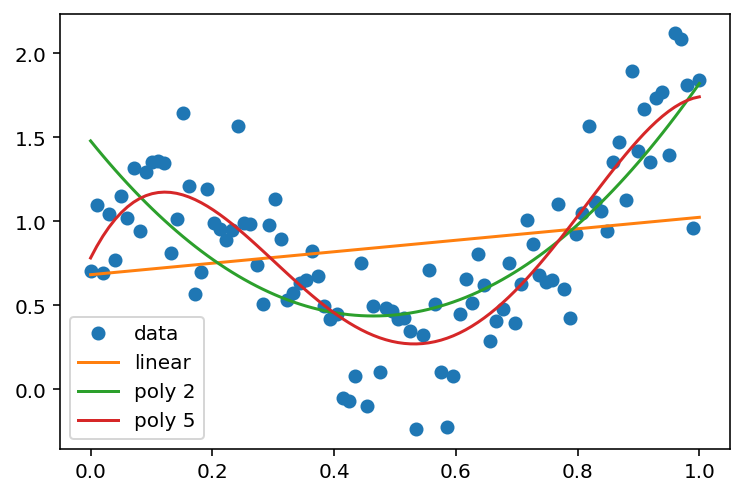

In [50]:
# Fit a linear model (identity basis)
y_hat_linear = y_hat_basis(x, y, x, phi_linear)
y_hat_poly_2 = y_hat_basis(x, y, x, lambda x: phi_poly(x, 2))
y_hat_poly_5 = y_hat_basis(x, y, x, lambda x: phi_poly(x, 5))
plt.plot(x, y, 'o', label='data')
plt.plot(x, y_hat_linear, label='linear')
plt.plot(x, y_hat_poly_2, label='poly 2')
plt.plot(x, y_hat_poly_5, label='poly 5')
plt.legend(loc='best')

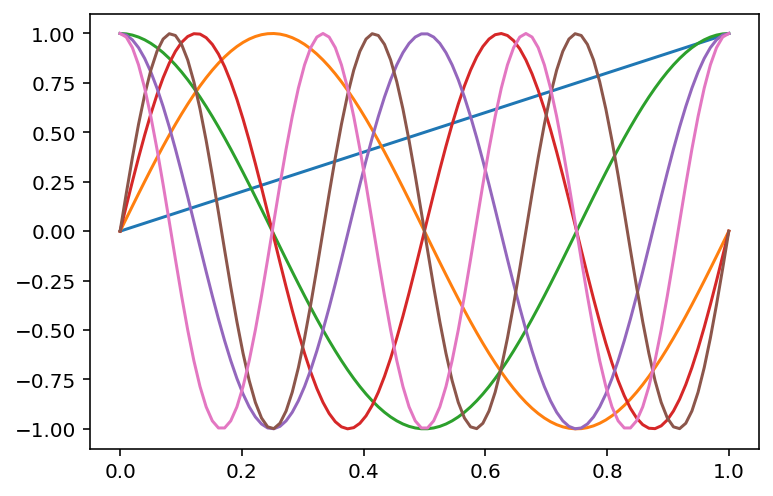

In [61]:
# sine basis
def phi_sine(x, d):
    out = [x]
    for i in range(1, d+1):
        out.append(np.sin(2*np.pi*x*i))
        # Append cosine
        out.append(np.cos(2*np.pi*x*i))
    return np.stack(out, axis=1)

# Plot sine basis
d = 3
plt.plot(x, phi_sine(x, d))

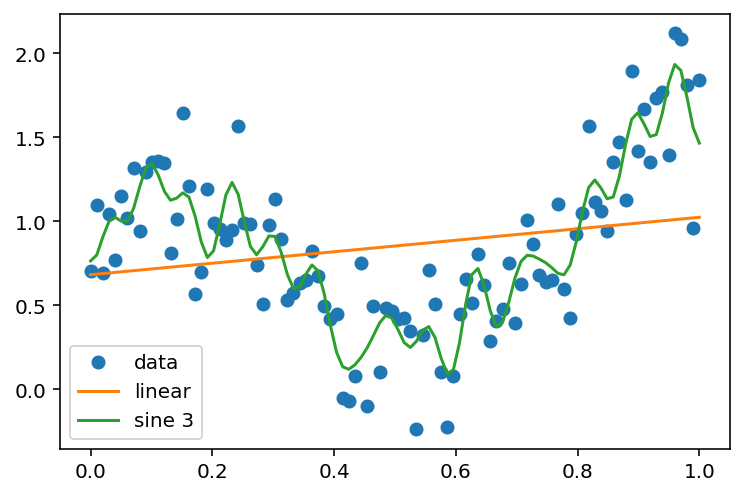

In [65]:
# fit sine basis model
y_hat_sine_3 = y_hat_basis(x, y, x, lambda x: phi_sine(x, 15))

plt.plot(x, y, 'o', label='data')
plt.plot(x, y_hat_linear, label='linear')
#plt.plot(x, y_hat_poly_2, label='poly 2')
#plt.plot(x, y_hat_poly_5, label='poly 5')
plt.plot(x, y_hat_sine_3, label='sine 3')
plt.legend(loc='best')

In [66]:
# Gaussian basis
def phi_gaussian(x, d, mu, sigma):
    """
    x: (n,) denotes the input
    d: (int) denotes the dimension of the basis
    mu: (d,) denotes the mean of the basis
    sigma: (d,) denotes the standard deviation of the basis
    """
    out = []
    for i in range(d):
        out.append(np.exp(-(x-mu[i])**2 / (2*sigma[i]**2)))
    return np.stack(out, axis=1)

In [68]:
phi_gaussian(np.array([0.5]), 1, np.array([0.5]), np.array([0.1]))

array([[1.]])

In [69]:
phi_gaussian(np.array([1]), 1, np.array([0.5]), np.array([0.1]))

array([[3.72665317e-06]])

In [70]:
phi_gaussian(np.array([1]), 1, np.array([0.8]), np.array([0.1]))

array([[0.13533528]])

In [71]:
phi_gaussian(np.array([1]), 1, np.array([0.5]), np.array([4]))

array([[0.99221794]])

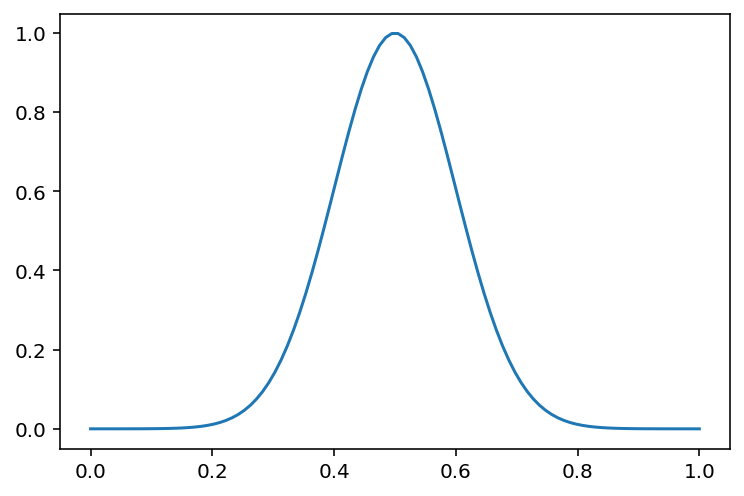

In [73]:
# Now, let us visualize the basis for different x but a single mu and sigma
x = np.linspace(0, 1, 100)

plt.plot(x, phi_gaussian(x, 1, np.array([0.5]), np.array([0.1])))

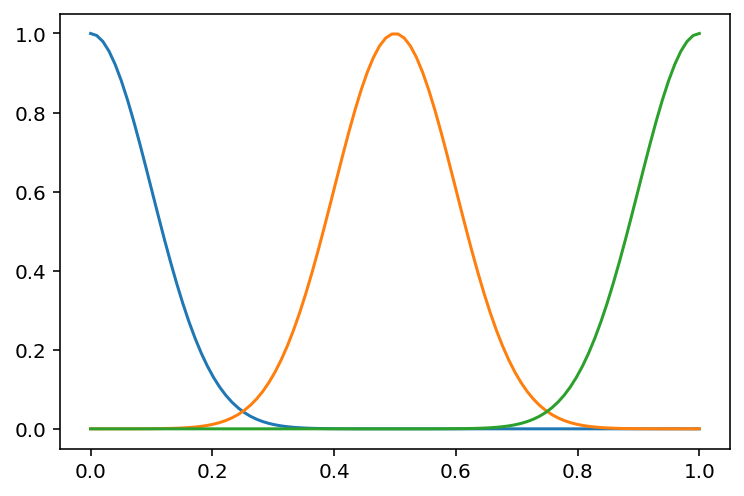

In [74]:
# Now, let us plot the basis for three different mu and sigma
d = 3
mu = np.linspace(0, 1, d)
sigma = np.ones(d) * 0.1
plt.plot(x, phi_gaussian(x, d, mu, sigma))

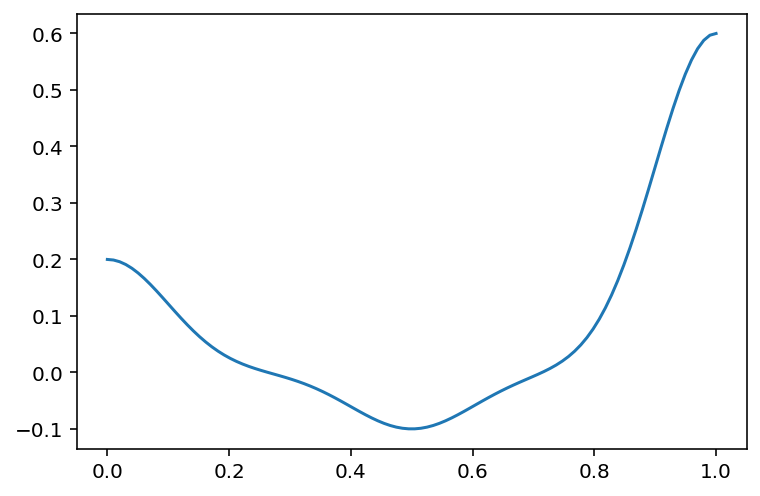

In [75]:
# We are seeking coefficients for the basis functions
# Let us plot the basis functions for different coefficients

d = 3
mu = np.linspace(0, 1, d)
sigma = np.ones(d) * 0.1
coeffs = np.array([0.2, -0.1, 0.6])
plt.plot(x, phi_gaussian(x, d, mu, sigma) @ coeffs)



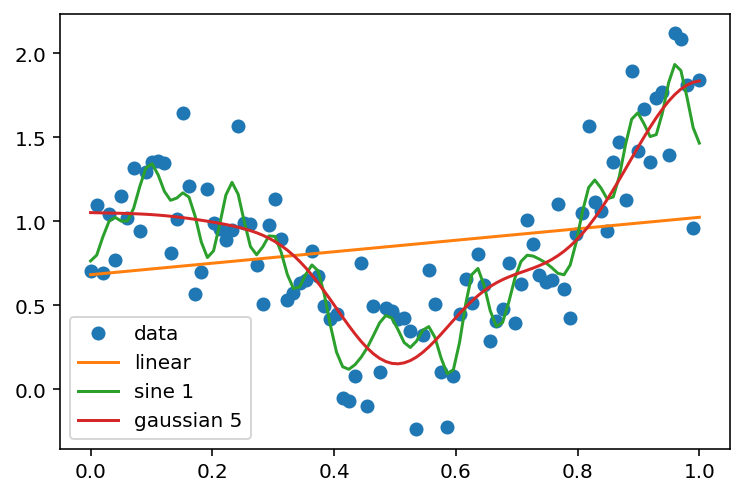

In [77]:
# Now, let us fit a Gaussian basis model 


d = 5
mu = np.linspace(0, 1, d)
sigma = np.ones(d) * 0.1
y_hat_gaussian_5 = y_hat_basis(x, y, x, lambda x: phi_gaussian(x, d, mu, sigma))
plt.plot(x, y, 'o', label='data')
plt.plot(x, y_hat_linear, label='linear')
#plt.plot(x, y_hat_poly_2, label='poly 2')
#plt.plot(x, y_hat_poly_5, label='poly 5')
plt.plot(x, y_hat_sine_3, label='sine 1')
plt.plot(x, y_hat_gaussian_5, label='gaussian 5')
plt.legend(loc='best')

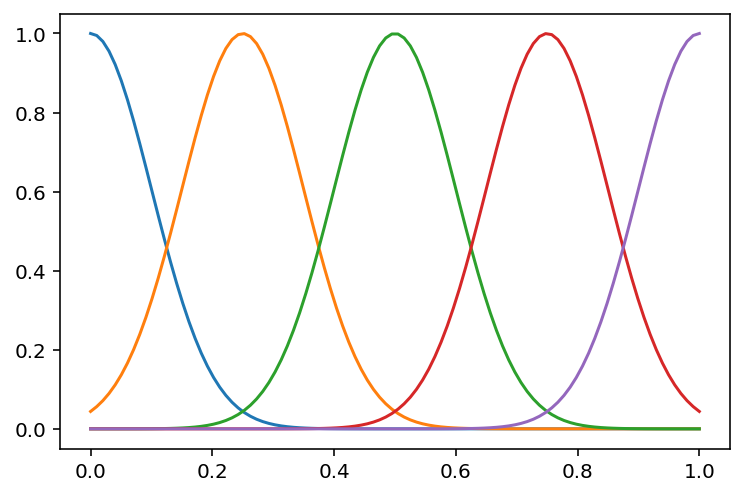

In [79]:
# Now, let us visualize the different Gaussian basis functions and their coefficients

d = 5
mu = np.linspace(0, 1, d)
sigma = np.ones(d) * 0.1

X = phi_gaussian(x, d, mu, sigma)
plt.plot(x, X)

In [80]:
lr = LinearRegression()
lr.fit(X, y)
lr.coef_, lr.intercept_

(array([-0.03558785, -0.09144039, -0.92094484, -0.32654565,  0.75825773]),
 1.0918335515196196)

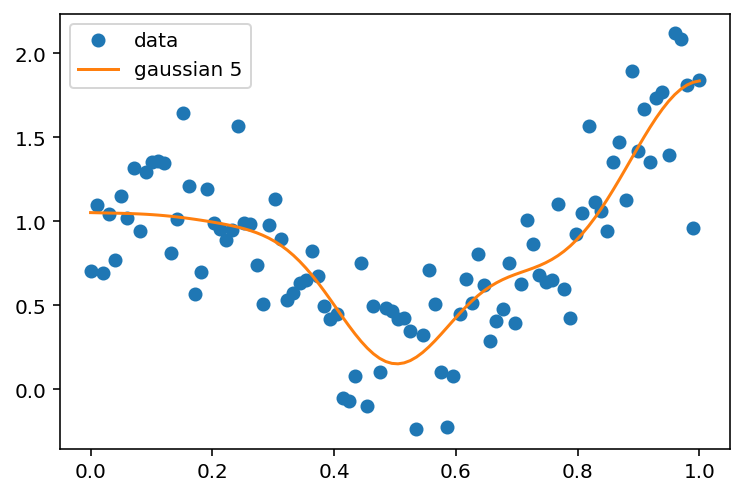

In [81]:
# Plot the predictions
plt.plot(x, y, 'o', label='data')
plt.plot(x, lr.predict(X), label='gaussian 5')
plt.legend(loc='best')

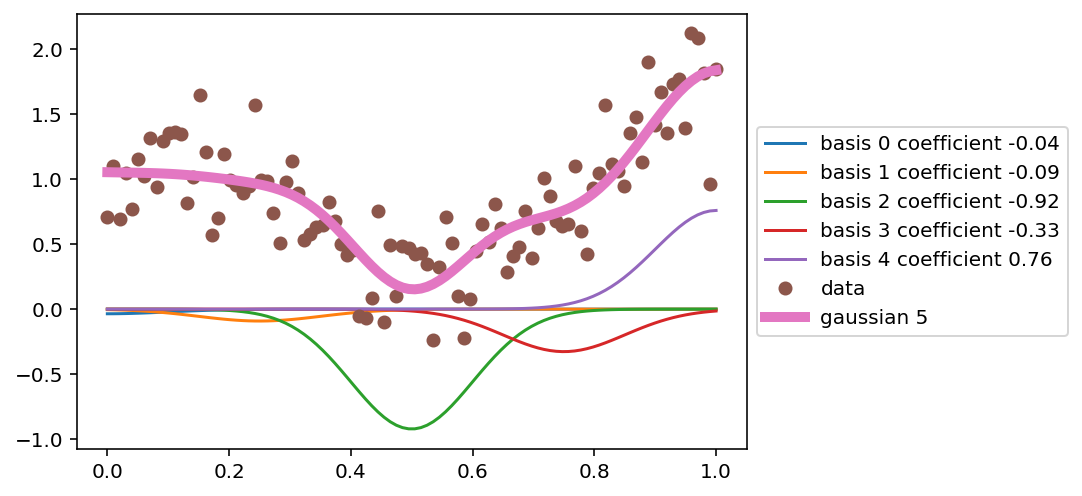

In [89]:
# Plot each of the scaled basis functions (scaling by the coefficients)
for i in range(d):
    plt.plot(x, lr.coef_[i] * X[:, i], label=f'basis {i} coefficient {lr.coef_[i]:.2f}')

plt.plot(x, y, 'o', label='data')
plt.plot(x, lr.predict(X), label='gaussian 5', lw = 5)

# Legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))



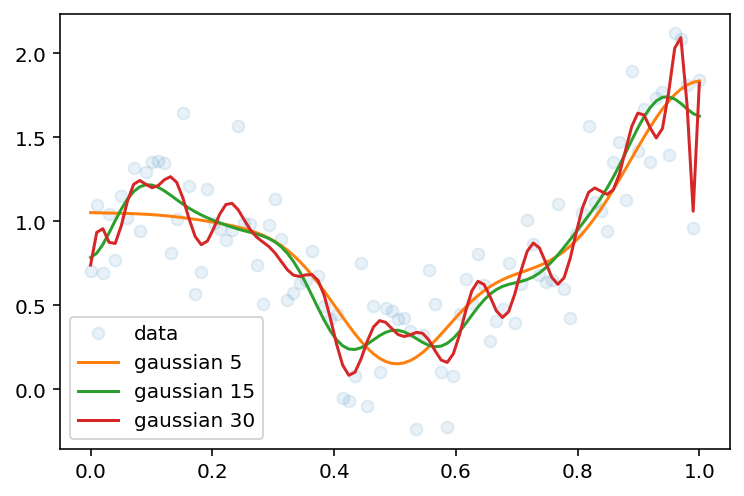

In [96]:
# plot high degree Gaussian basis
d = 15
mu = np.linspace(0, 1, d)
sigma = np.ones(d) * 0.1

fit_phi_gaussian = lambda x: phi_gaussian(x, d, mu, sigma)
y_hat_gaussian_15 = y_hat_basis(x, y, x, fit_phi_gaussian)
plt.plot(x, y, 'o', label='data', alpha=0.1)

plt.plot(x, y_hat_gaussian_5, label='gaussian 5')
plt.plot(x, y_hat_gaussian_15, label='gaussian 15')

d = 30
mu = np.linspace(0, 1, d)
sigma = np.ones(d) * 0.1

fit_phi_gaussian = lambda x: phi_gaussian(x, d, mu, sigma)
y_hat_gaussian_30 = y_hat_basis(x, y, x, fit_phi_gaussian)

plt.plot(x, y_hat_gaussian_30, label='gaussian 30')
plt.legend(loc='best')